# Titanic Data Analysis

## **Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Reading & Exploring the Dataset

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data types and missing values
print(df.info())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594

Basic information - SibSP is how many siblings and spouses of the passengers have boarded and Parch is how many of parents/children of the passengers are on board - Our goal is to predict the variable survived 

## Cleaning and **Pre-Processing**

In [4]:
#Checking for duplicate values in dataset
df.drop_duplicates(inplace=True)

In [5]:
#Splitting the name into First, Last and Title
df[["LastName", "Title" ,"FirstName"]] = df["Name"].str.split(', |\.', expand=True)[[0, 1, 2]]

In [6]:
# Selecting relevant features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = df['Survived']

In [7]:
#Creating dummies for gender to use in ML model
X_dummy = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X_dummy

,Pclass,Age,SibSp,Parch,Sex_male
0,3,22.0,1,0,1
1,1,38.0,1,0,0
2,3,26.0,0,0,0
3,1,35.0,1,0,0
4,3,35.0,0,0,1
...,...,...,...,...,...
886,2,27.0,0,0,1
887,1,19.0,0,0,0
888,3,NaN,1,2,0
889,1,26.0,0,0,1


In [8]:
#Filling the missing values with the mean of there column
X_dummy.fillna(X.mean(), inplace=True)

# REGRESSION: Logistic vs Linear

The idea behind conducting regression is to predict if the passenger would survive or not. Regression will show us how well that attribute about the passenger will determine their survival. 
We cannot conduct regression on all columns, we need to first determine which columns may actually have a a strong correlation with the Survived column. Rather than calculating the correlation for each column with the "Survived" column, we create a heat map for a better visualizaton of the correlations. 

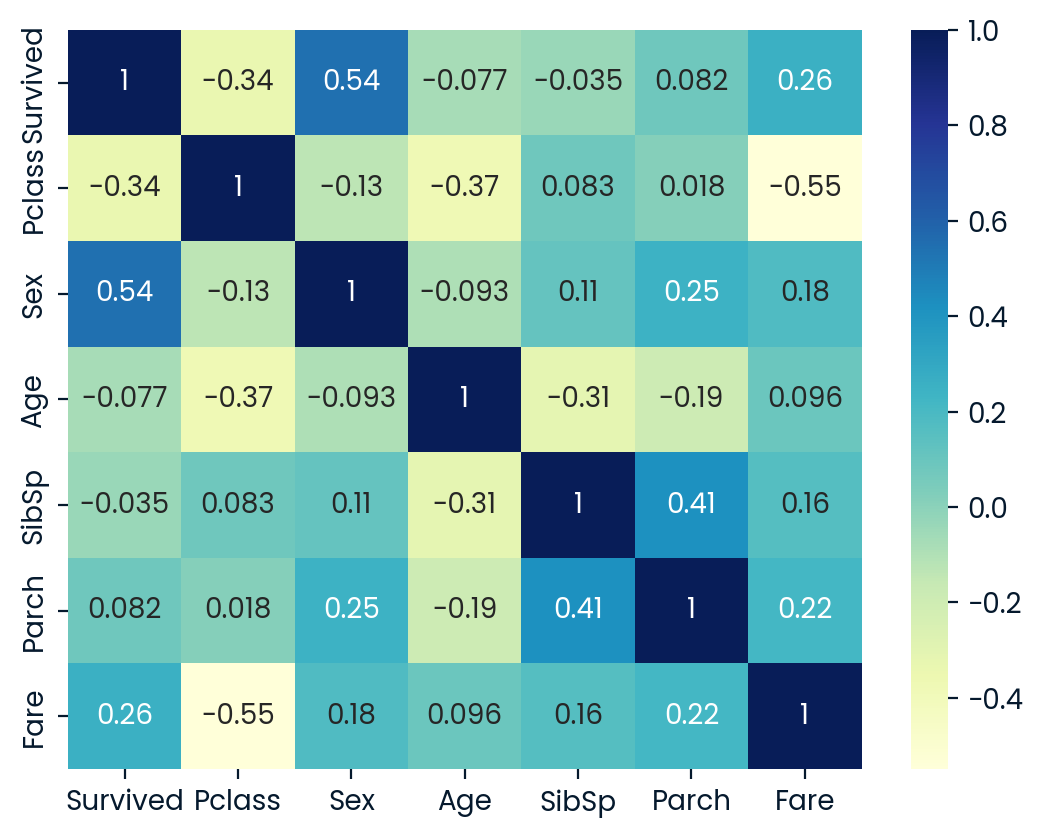

In [9]:
##Logistic Regression
df_Reg = pd.DataFrame(df,columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin'])
#converting the sex column into binary for correlation
sex_mapping = {'male': 0, 'female': 1}
df_Reg['Sex'] = df_Reg['Sex'].map(sex_mapping)
df_Reg

#Heatmap correlation
dataplot=sns.heatmap(df_Reg.corr(),cmap="YlGnBu", annot=True) 
#Heatmap plot
plt.show()
##Parameter - any correlation greater than 0.8 will not be used 

Based on the heat map, Pclass, Sex and Fare have a greater correlation with Survived column than the remaining columns. 

Above, we tried a linear regression model however we can see by the visualization this method faile. This is because linear regression can only be run between 2 continuous variables. However, since "Survived" is a binary column, logistic regression would be a more appropriate regression model. 

In [10]:
#Sex 
X_Sex = df_Reg[['Sex']]
y_Sex = df_Reg['Survived']

X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_Sex, y_Sex, test_size=0.4, random_state=42)
model = LogisticRegression()
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
accuracy_sex = accuracy_score(y_test_S, y_pred_S)
print("Accuracy for Sex and Survived:", accuracy_sex)

#Fare
X_Fare = df_Reg[['Fare']]
y_Fare = df_Reg['Survived']

X_trainF, X_testF, y_trainF, y_testF = train_test_split(X_Fare, y_Fare, test_size=0.4, random_state=42)
model = LogisticRegression()
model.fit(X_trainF, y_trainF)
y_predF = model.predict(X_testF)
accuracy_fare = accuracy_score(y_testF, y_predF)
print("Accuracy for Fare and Survived:", accuracy_fare)

#Pclass
X_Pclass = df_Reg[['Pclass']]
y_Pclass = df_Reg['Survived']

X_trainP, X_testP, y_trainP, y_testP = train_test_split(X_Pclass, y_Pclass, test_size=0.4, random_state=42)
model = LogisticRegression()
model.fit(X_trainP, y_trainP)
y_predP = model.predict(X_testP)
accuracy_pclass = accuracy_score(y_testP, y_predP)
print("Accuracy for Pclass and Survived:", accuracy_pclass)



Accuracy for Sex and Survived: 0.773109243697479
Accuracy for Fare and Survived: 0.6750700280112045
Accuracy for Pclass and Survived: 0.6946778711484594


# K-Nearest Neighbor

The K-Nearest Neighbor model uses proximity to make predictions on individula data values. With this model, we will predict Survival on the given Titanic dataset

<AxesSubplot: xlabel='Survived', ylabel='count'>

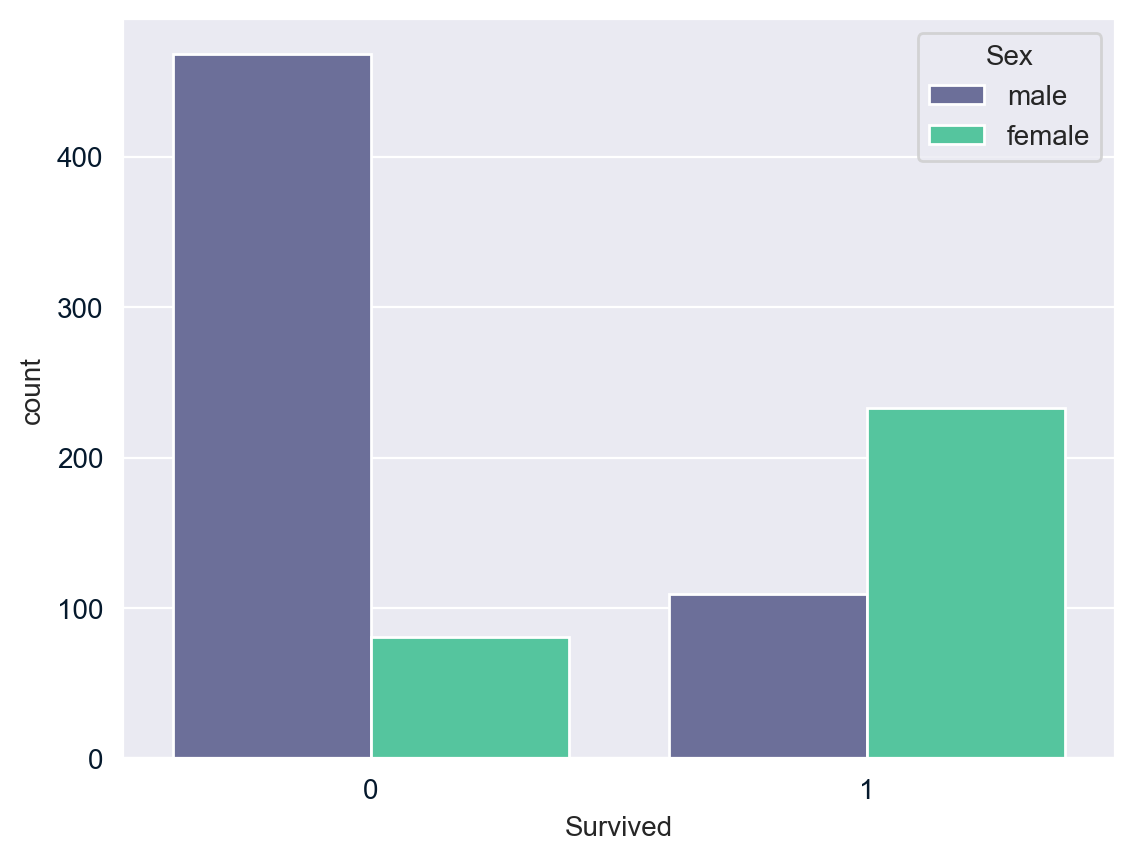

In [2]:
#df = pd.read_csv('Titanic-Dataset.csv')

#Pre-Processing (K-Nearest)
#begin by seeing a visual of Survival when compared to other attributes

sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=df) #Survival by Sex

<AxesSubplot: xlabel='Survived', ylabel='count'>

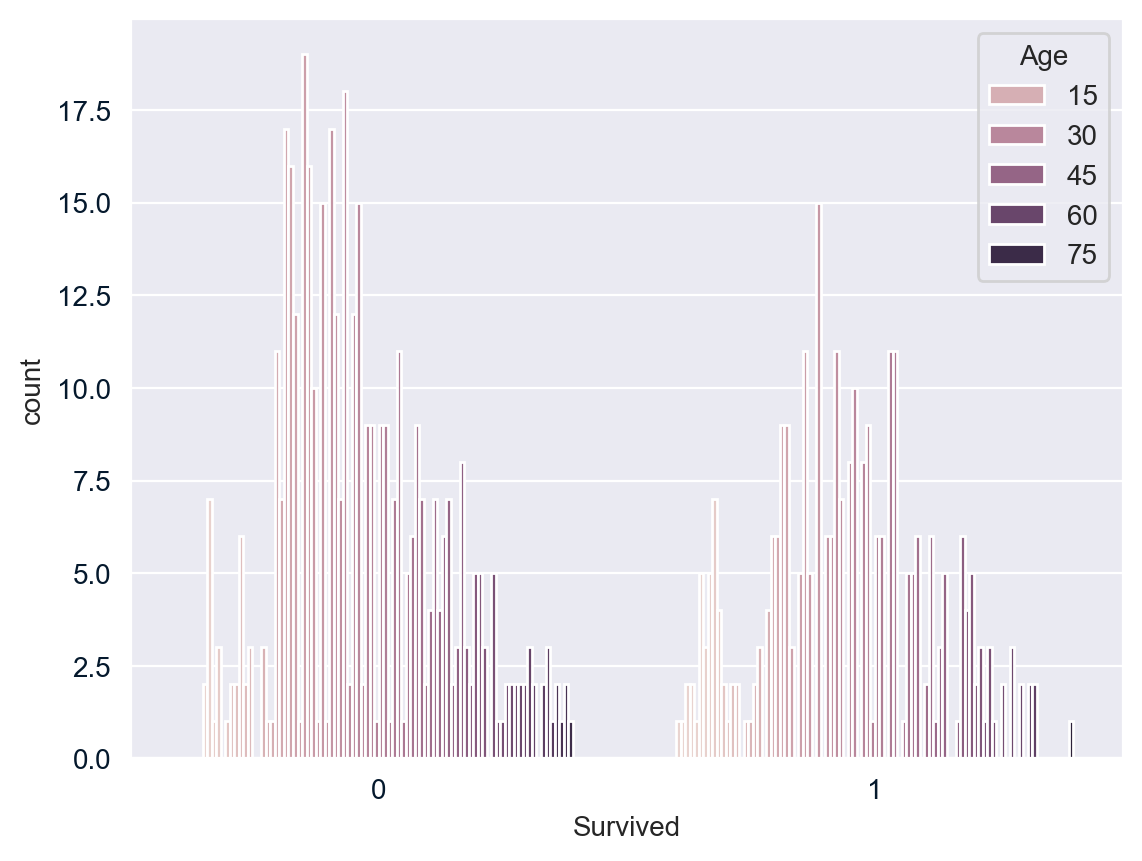

In [3]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Age', data=df) #Survival by Age

<AxesSubplot: xlabel='Survived', ylabel='count'>

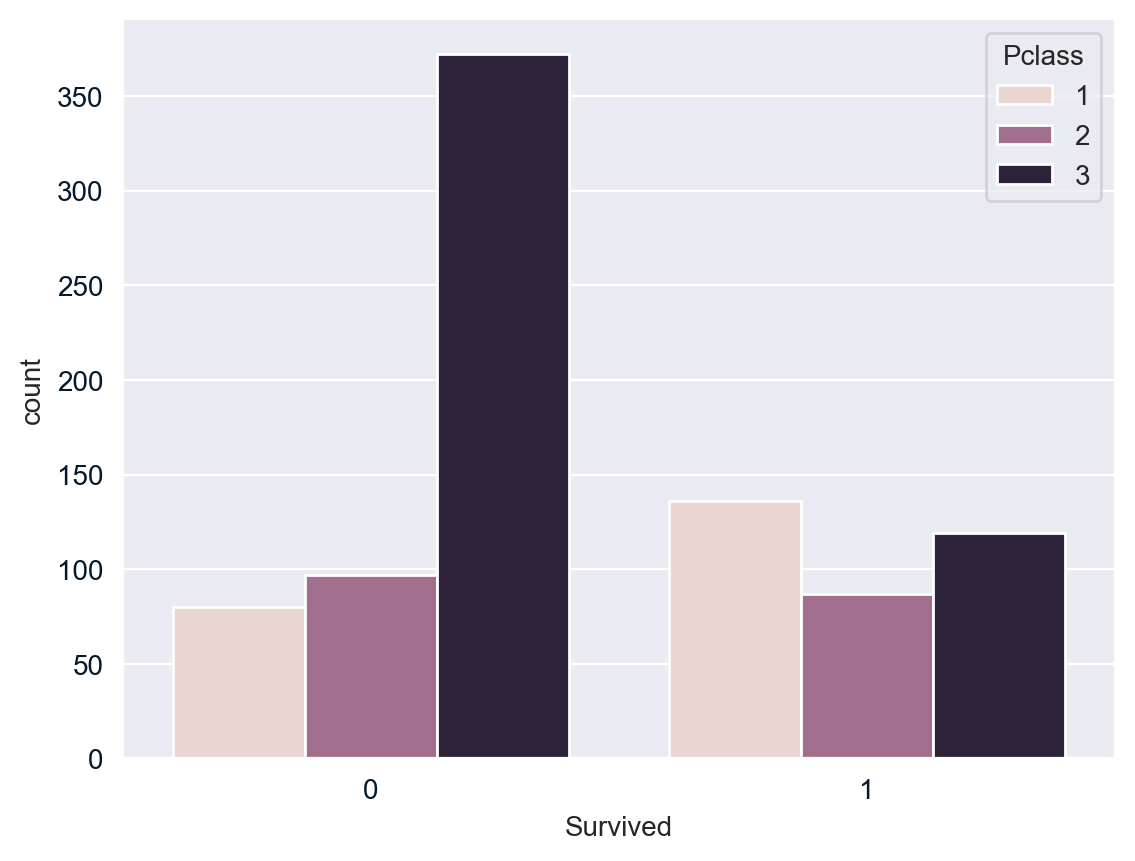

In [4]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Pclass', data=df) #Survival by Pclass

In [5]:
#Check null values in df prior to implementing K-Nearest
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Out of all the variables with null values, Age seems to be of most importance. We will replace the null values with the average age of the entire dataset. Cabin and Embarked won't be useful information so we will drop them later.

In [6]:
#Replace all null Age values with the Age average of the dataset

lst1=[]
lst2=[]
lst3=[]
n=len(df.Survived)
i=0
while i< n:
    if df['Pclass'][i]==1 and pd.isnull(df['Age'][i]) == False:
        lst1.append(df['Age'][i])
    elif df['Pclass'][i]==2  and pd.isnull(df['Age'][i]) == False:
        lst2.append(df['Age'][i])
    elif df['Pclass'][i]==3 and pd.isnull(df['Age'][i]) == False :
        lst3.append(df['Age'][i])
    i+=1

Mean_Pclass_1 = sum(lst1)/len(lst1)
Mean_Pclass_2 = sum(lst2)/len(lst2)
Mean_Pclass_3 = sum(lst3)/len(lst3)


def impute (col):
    Age= col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return Mean_Pclass_1
        elif Pclass ==2:
            return Mean_Pclass_2
        else:
            return Mean_Pclass_3
    else:
        return Age

In [7]:
#update def.Age & create column 'family_size'

df.Age= df[['Age', 'Pclass']].apply(impute, axis=1)
df.groupby('Pclass').agg({'Age':['min', 'max', 'count', 'mean']})
df['family_size'] = df.SibSp + df.Parch+1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
#Since 'Sex' and 'Embarked' are categorical values of importance, we will convert them to numerical values for easier use

sex=pd.get_dummies(df.Sex, drop_first=True)
embark=pd.get_dummies(df.Embarked, drop_first=True)
df=pd.concat([df,sex,embark], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,1


In [9]:
#Drop unneessary columns and find the correlation between the now processed dataset
df.drop(['Name', 'PassengerId', 'Sex', 'Ticket', 'Embarked', 'SibSp', 'Cabin'], axis=1, inplace=True)
df

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
0,0,3,22.00000,0,7.2500,2,1,0,1
1,1,1,38.00000,0,71.2833,2,0,0,0
2,1,3,26.00000,0,7.9250,1,0,0,1
3,1,1,35.00000,0,53.1000,2,0,0,1
4,0,3,35.00000,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,13.0000,1,1,0,1
887,1,1,19.00000,0,30.0000,1,0,0,1
888,0,3,25.14062,2,23.4500,4,0,0,1
889,1,1,26.00000,0,30.0000,1,1,0,0


In [10]:
df.corr()

,Survived,Pclass,Age,Parch,Fare,family_size,male,Q,S
Survived,1.000000,-0.338481,-0.050504,0.081629,0.257307,0.016639,-0.543351,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.403858,0.018443,-0.549500,0.065997,0.131900,0.221009,0.081720
Age,-0.050504,-0.403858,1.000000,-0.175799,0.120886,-0.254217,0.080464,-0.070315,-0.000483
Parch,0.081629,0.018443,-0.175799,1.000000,0.216225,0.783111,-0.245489,-0.081228,0.063036
Fare,0.257307,-0.549500,0.120886,0.216225,1.000000,0.217138,-0.182333,-0.117216,-0.166603
family_size,0.016639,0.065997,-0.254217,0.783111,0.217138,1.000000,-0.200988,-0.058592,0.079977
male,-0.543351,0.131900,0.080464,-0.245489,-0.182333,-0.200988,1.000000,-0.074115,0.125722
Q,0.003650,0.221009,-0.070315,-0.081228,-0.117216,-0.058592,-0.074115,1.000000,-0.496624
S,-0.155660,0.081720,-0.000483,0.063036,-0.166603,0.079977,0.125722,-0.496624,1.000000


In [11]:
#K-Nearest Implementation

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X=df.drop('Survived', axis=1)
y=df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=56)

kNN = KNeighborsClassifier()
kNN.fit(X_train,y_train)

y_pred=kNN.predict(X_test)

knn_accy = round(accuracy_score(y_test, y_pred), 3) #using k-value of 3
print ('K-nearest accuracy:',knn_accy)
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))

K-nearest accuracy: 0.739
Confusion matrix: [[189  39]
 [ 54  75]]
Precision score: 0.6578947368421053
Recall score: 0.5813953488372093


# Decision Tree

Now we want to implement a Decision Tree to see if the results are any better. This algorithm will use decision rules implememted on data values, or nodes from the training dataset to make predictions on the nodes of the test `dataset.`

# Titanic Survival Prediction using Naive Bayes Classifier Algorithm

This project aims to predict the survival of passengers aboard the Titanic using the Naive Bayes classifier algorithm. The dataset used in this project contains information about Titanic passengers, such as their age, gender, passenger class, and other relevant features. By training a Naive Bayes classifier on this data, we can predict whether a given passenger would have survived the Titanic disaster.

In [21]:
# importing the Guassian Naive Bayes model.
from sklearn.naive_bayes import GaussianNB 
df = pd.read_csv("Titanic-Dataset.csv")

In [22]:
# dropping certain columns that don't have any impact on the survival rate.
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
target = df["Survived"] # creating a series for the survived column.
inputs = df.drop("Survived", axis=1) # creating a separate dataframe by removing the survived column.
dummies = pd.get_dummies(inputs["Sex"]) # converting the sex column into dummy variables.

display(dummies.head())
print(dummies.dtypes)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


female    uint8
male      uint8
dtype: object


In [23]:
# concatenating the inputs dataframe with the dummies dataframe.
inputs = pd.concat([inputs, dummies], axis=1)
# dropping the sex column because we now have the female and male columns.
inputs.drop(["Sex"], axis=1, inplace=True)
# it can be observed that some columns contains null values.
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [24]:
# one way of handling these null values is to fill those values with the mean value of the whole column.
# we can also make these values an integer type values.
inputs["Age"] = inputs["Age"].fillna(inputs["Age"].mean())

inputs.Age[:10]
# as we can see the 5th row in the earlier cell was null and now it is replaced with the mean value.

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.4, random_state=42)
# 40% test size and 60% train size.
print(len(X_train), len(X_test), len(inputs))

# calculating training and testing data percentage.
print(len(X_train) / len(inputs)) # training data %
print(len(X_test) / len(inputs)) # testing data %

534 357 891
0.5993265993265994
0.4006734006734007


In [26]:
# we are using the Gaussian Naive Bayes model.
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7675070028011205


# Support Vector Machine - Non Linear

In [28]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.4, random_state=42)

In [29]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Training the SVM model
#svm_model = SVC(kernel='linear', random_state=42)
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [31]:
# Making predictions
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

In [32]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.8389513108614233
Test Accuracy: 0.8179271708683473

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       216
           1       0.81      0.71      0.75       141

    accuracy                           0.82       357
   macro avg       0.82      0.80      0.80       357
weighted avg       0.82      0.82      0.82       357



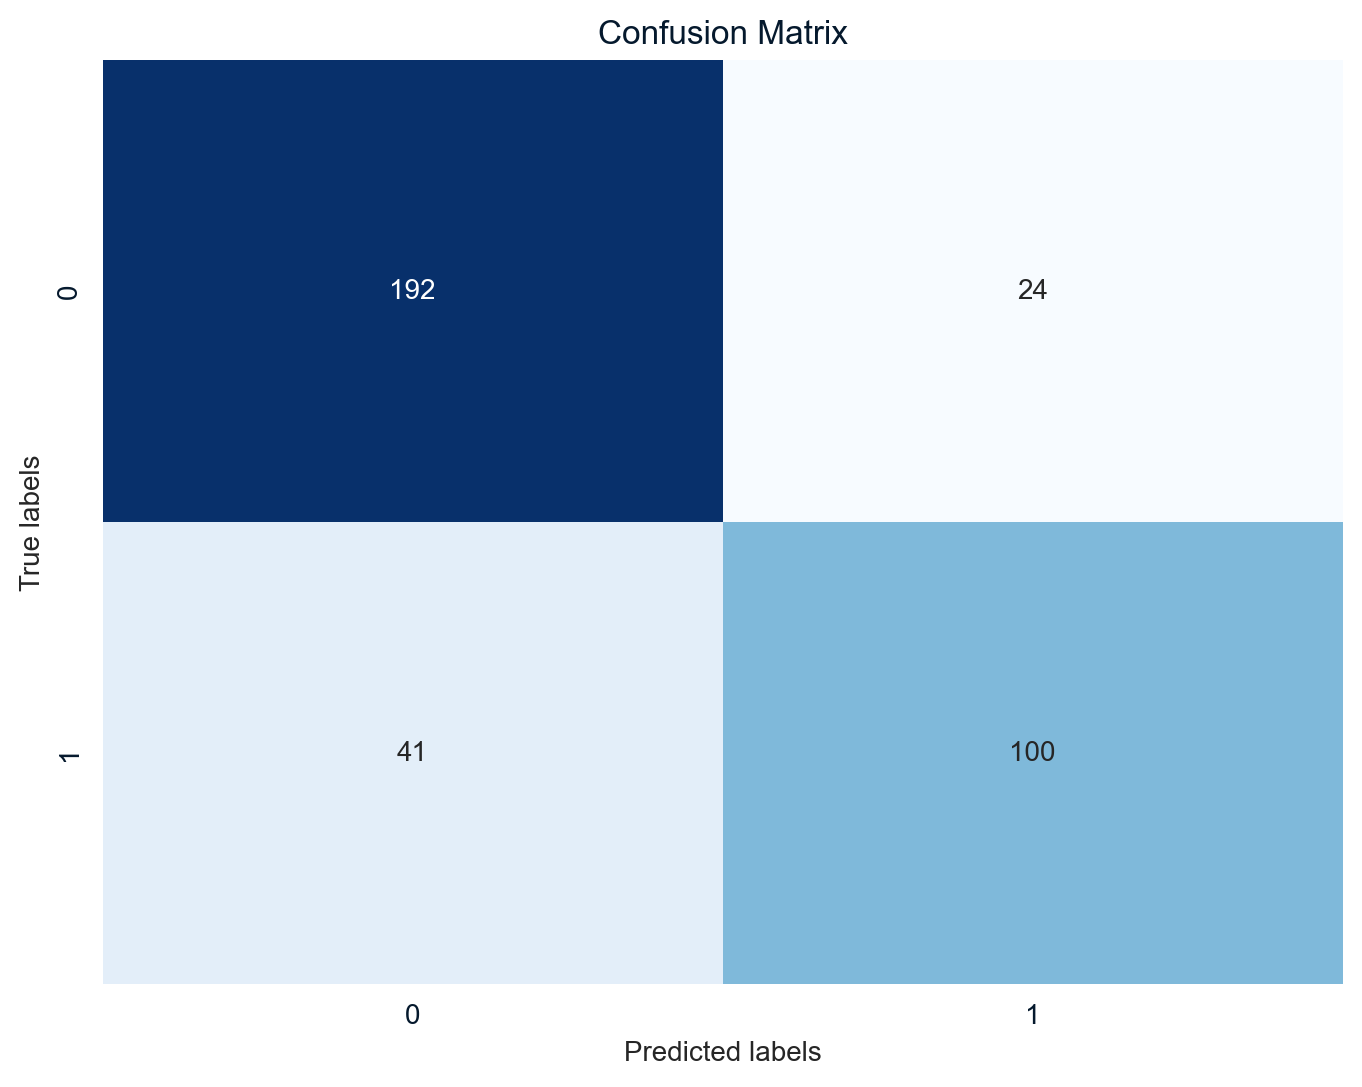

In [33]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## SVM with Grid Search - (from feedback) - Hyperparameter Tuning 

In [3]:
#SVM with Grid Search
# Step 1: Load the dataset
data = pd.read_csv("Titanic-Dataset.csv")

# Step 2: Preprocess the data
# Drop irrelevant columns and handle missing values
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Split features and labels
X = data.drop('Survived', axis=1)
y = data['Survived']

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Build the SVM model
svm = SVC()

# Step 6: Hyperparameter tuning using Grid Search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters:", grid.best_params_)

# Step 7: Evaluate the model
best_svm = grid.best_estimator_
predictions = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

# Clustering Analysis

## K-means Clustering

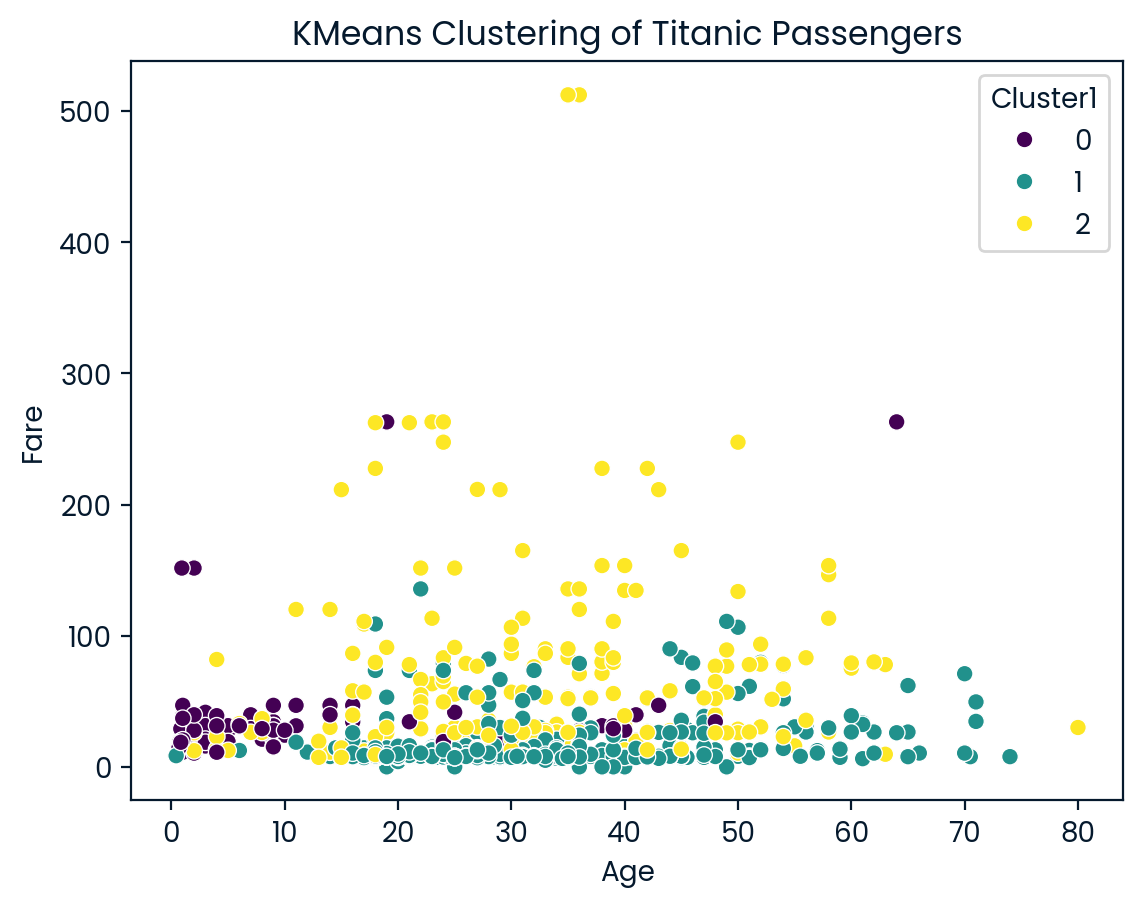

In [13]:
# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')


# Drop irrelevant columns and handle missing values
titanic_df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(titanic_df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Add cluster labels to the DataFrame
df['Cluster1'] = clusters

# Visualize clusters
sns.scatterplot(data=df, x='Age', y='Fare', hue='Cluster1', palette='viridis')
plt.title('KMeans Clustering of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

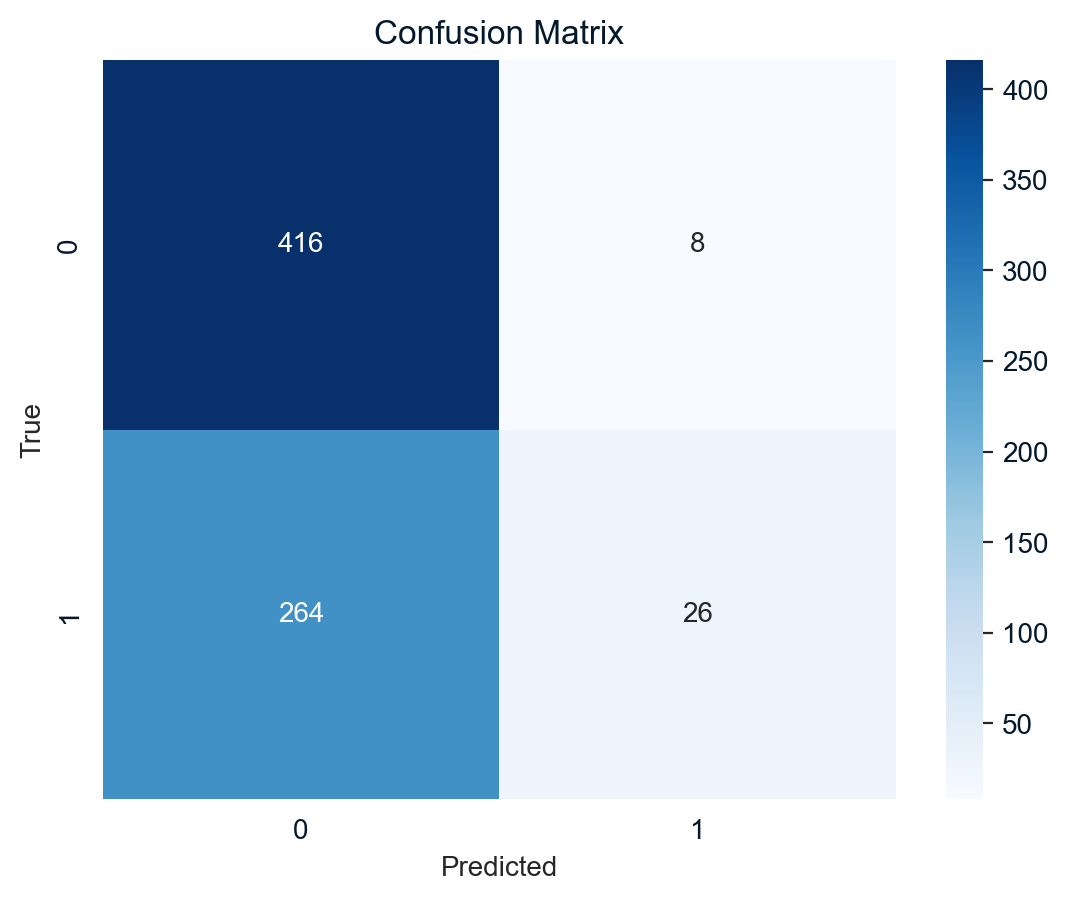

In [36]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
# Drop irrelevant features and missing values
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
titanic_data = titanic_data.dropna()

# Convert categorical variables to dummy variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'], drop_first=True)

# Remove the 'Survived' column (labels)
X = titanic_data.drop('Survived', axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Compare clustering results with actual survival labels
conf_matrix = confusion_matrix(titanic_data['Survived'], cluster_labels)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## DBSCAN Clustering

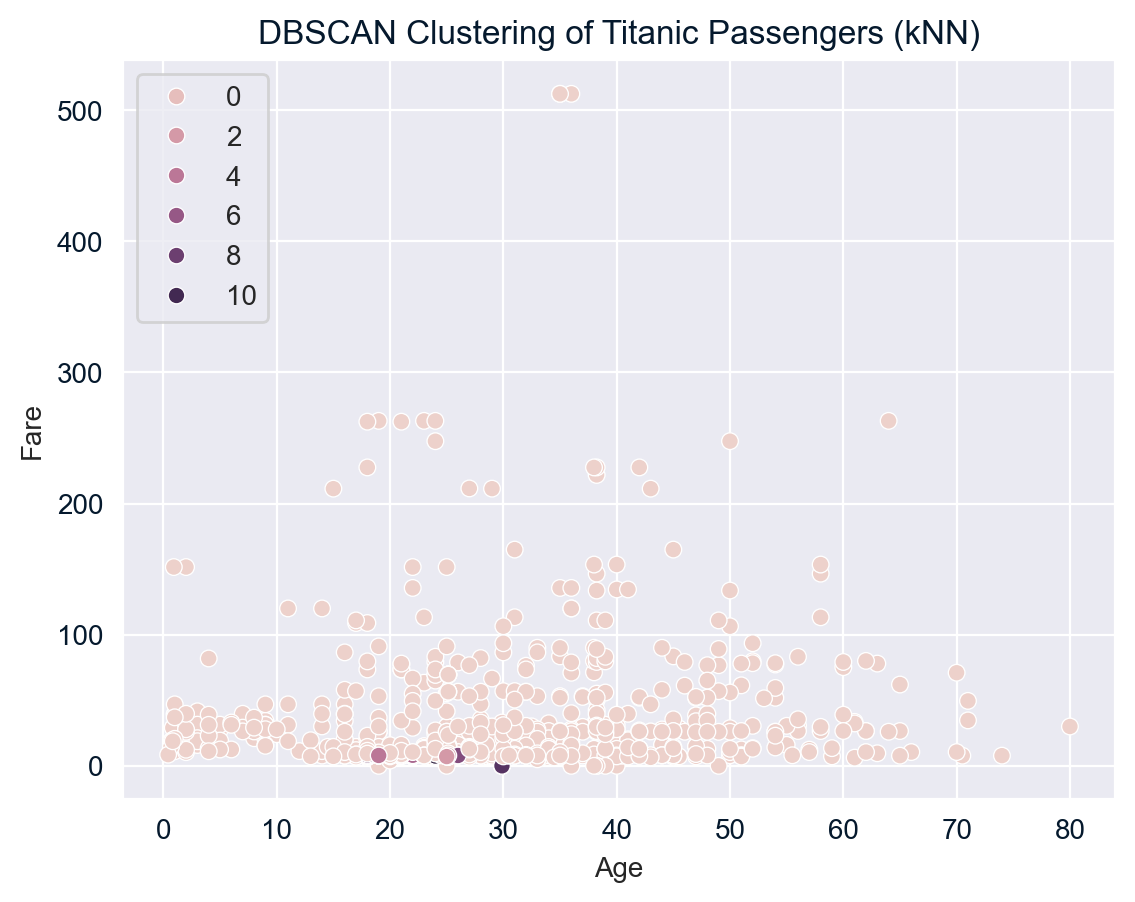

In [35]:
# Clustering on K-Neighbors by DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5) #DBSCAN Implementation; set k = 5 (default for DBSCAN)
clusters = dbscan.fit_predict(X)
df['Clusters'] = clusters


sns.scatterplot(data=df, x='Age', y='Fare', hue='Clusters') #Cluster Visualization
plt.title('DBSCAN Clustering of Titanic Passengers (kNN)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(loc='upper left')
plt.show()

**Analysis**: By the clustering scatterplot, we notice greater values of 6-10 from a select few of those between ages 20-30, who paid a far cheaper fare than campared to other passengers (denoted by the purple points).Now, we will generate a confusion matrix to have a visual of its accuracy.

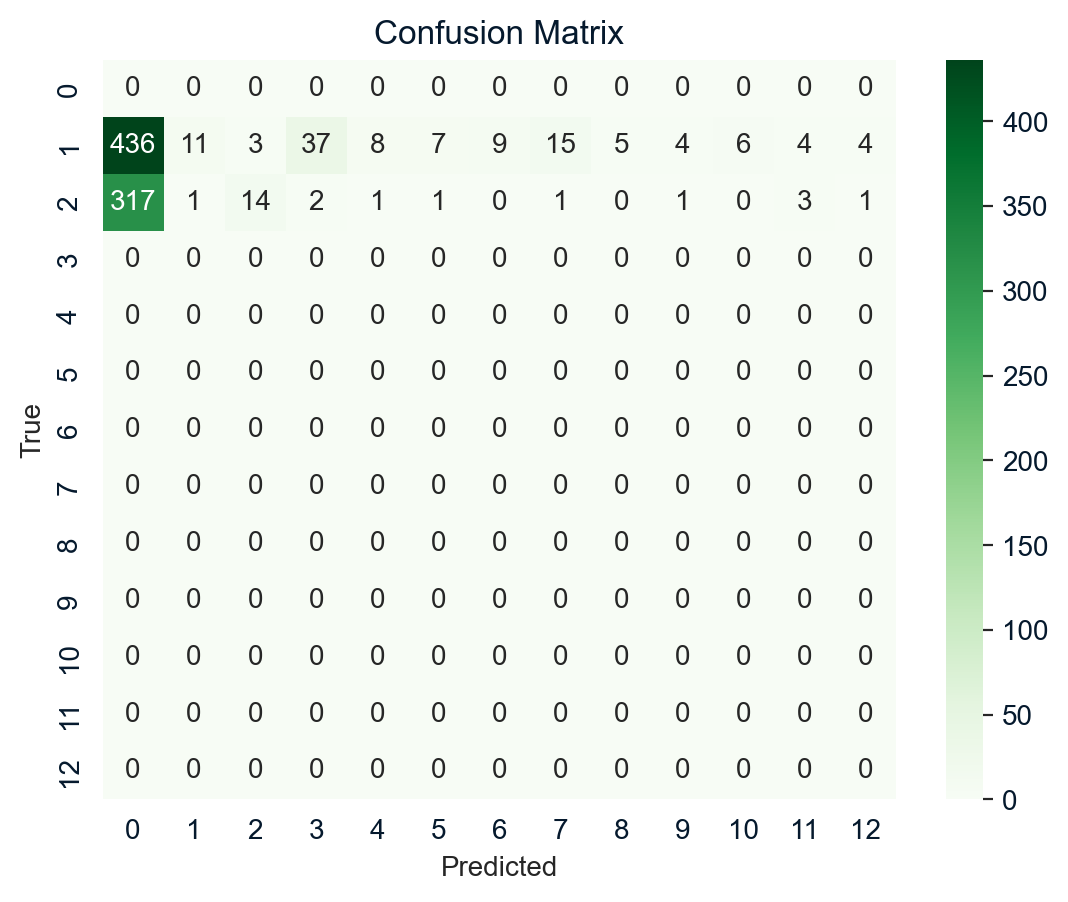

In [36]:
#Confusion Matrix on DBSCAN Clustering (kNN)

clustering1 = DBSCAN(eps=0.5, min_samples=5).fit(X) #DBSCAN Implementation (ms = 5 by DBSCAN default)
cluster_labels = clustering1.labels_

con_matrix = confusion_matrix(df['Survived'], cluster_labels) # Compare clustering results with survival
 
sns.heatmap(con_matrix, annot=True, fmt="d", cmap= 'Greens') #Confusion Matrix
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Hierarchical Clustering

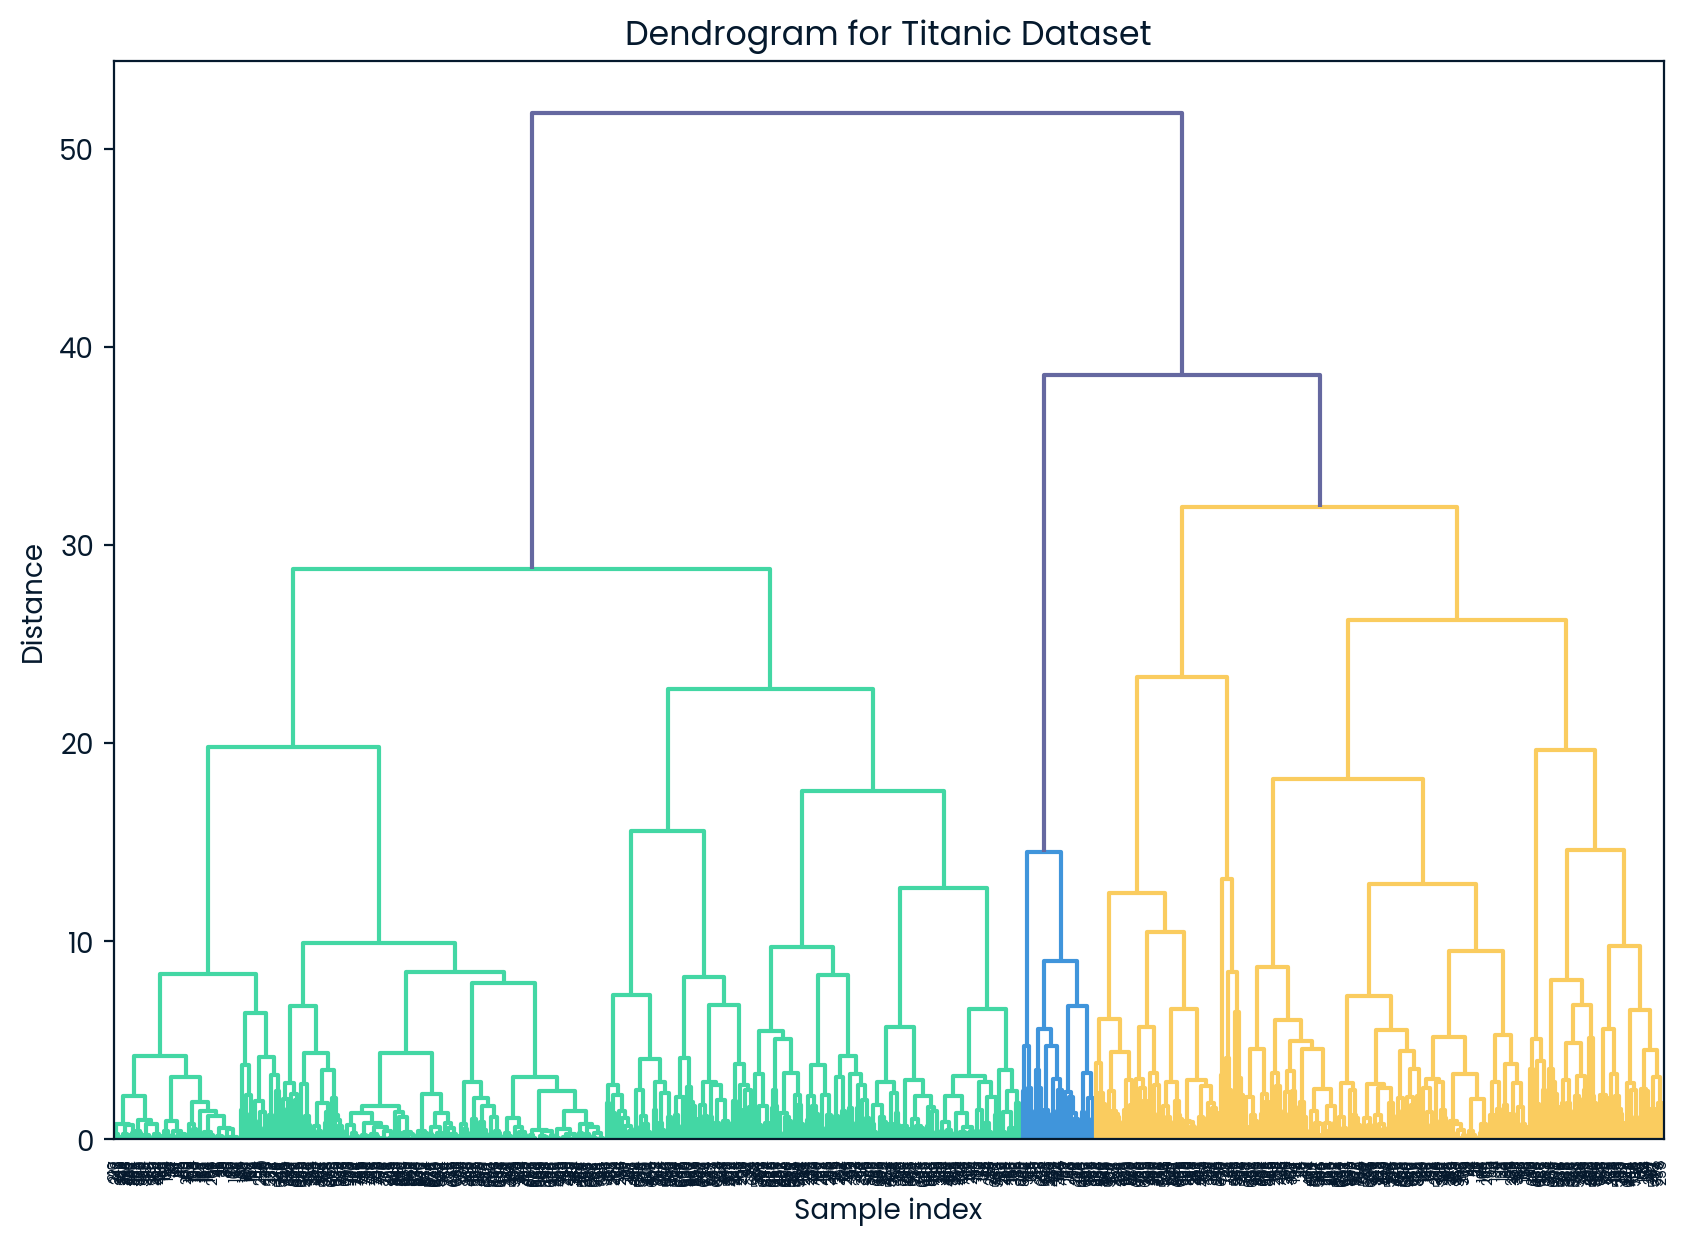

Cluster_Labels
1    0.162835
2    0.071429
3    0.776758
Name: Survived, dtype: float64


In [15]:
## Hierarchical Clustering
#titani_df from K-means clustering 
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate the linkage matrix
Z = linkage(X_scaled, method='ward')  # 'ward' is one of the methods you can use

# Plotting the dendrogram to help determine the number of clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Titanic Dataset')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Deciding on the number of clusters and fitting the hierarchical clustering
num_clusters = 3  #chosing the number of clusters based on the dendrogram
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Adding the cluster labels to the original dataframe for analysis
titanic_df['Cluster_Labels'] = clusters

# Analyzing clusters by survival rates
cluster_survival = titanic_df.groupby('Cluster_Labels')['Survived'].mean()

# Print cluster survival rates
print(cluster_survival)